In [1]:
import numpy as np
import pandas as pd
import math

df = pd.read_csv('./Data/listings_Stockholm.csv')
pd.set_option('display.max_columns', None)

df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,75590,https://www.airbnb.com/rooms/75590,20220924142204,2022-09-24,city scrape,Amazing nature location by a lake,"Apartment on the top floor, overlooking a lake...","Expect a wonderful stay in beautiful scenery, ...",https://a0.muscache.com/pictures/7430cc80-7a4f...,397766,https://www.airbnb.com/users/show/397766,Peter,2011-02-18,"Stockholm, Sweden",Easy going and pragmatic when it comes to livi...,a few days or more,0%,0%,f,https://a0.muscache.com/im/users/397766/profil...,https://a0.muscache.com/im/users/397766/profil...,NaN,1,2,"['email', 'phone', 'work_email']",t,t,"Nacka, Stockholm County, Sweden",Skarpnäcks,NaN,59.301170,18.128330,Entire rental unit,Entire home/apt,3,NaN,1 bath,2.0,1.0,"[""Hair dryer"", ""Long term stays allowed"", ""Hea...",$949.00,30,100,30.0,30.0,100.0,100.0,30.0,100.0,NaN,t,28,58,88,178,2022-09-24,10,0,0,2013-08-02,2016-07-08,4.80,5.00,4.89,4.89,5.00,4.78,4.78,NaN,f,1,1,0,0,0.09
1,109193,https://www.airbnb.com/rooms/109193,20220924142204,2022-09-24,previous scrape,Live by the ocean,"""The place to stay when in Stockholm"" accordin...","If you love to be close to town, but not actua...",https://a0.muscache.com/pictures/d7f30f83-73b7...,564237,https://www.airbnb.com/users/show/564237,Lennart,2011-05-07,"Stockholm, Sweden",I'm a happy guy living in a dream location cal...,NaN,NaN,100%,f,https://a0.muscache.com/im/users/564237/profil...,https://a0.muscache.com/im/users/564237/profil...,NaN,1,1,"['email', 'phone', 'work_email']",t,t,"Nacka, Stockholm County, Sweden",Östermalms,NaN,59.316400,18.161120,Entire rental unit,Entire home/apt,5,NaN,1 bath,2.0,2.0,"[""Hair dryer"", ""Smoke alarm"", ""Refrigerator"", ...","$1,800.00",10,28,10.0,10.0,1125.0,1125.0,10.0,1125.0,NaN,t,0,0,0,0,2022-09-24,31,1,0,2012-01-04,2022-07-10,4.83,4.84,4.94,4.90,4.87,4.60,4.55,NaN,t,1,1,0,0,0.24
2,149587,https://www.airbnb.com/rooms/149587,20220924142204,2022-09-24,city scrape,Modern house 15min from city centre,<b>The space</b><br />This is a very modern ho...,NaN,https://a0.muscache.com/pictures/1005171/cb1de...,721536,https://www.airbnb.com/users/show/721536,Teymur,2011-06-20,"Stockholm, Sweden",I am married and have two children.,within an hour,100%,0%,f,https://a0.muscache.com/im/pictures/user/f03d0...,https://a0.muscache.com/im/pictures/user/f03d0...,NaN,1,1,"['email', 'phone', 'work_email']",t,f,NaN,Rinkeby-Tensta,NaN,59.402500,17.988280,Entire home,Entire home/apt,6,NaN,3 baths,4.0,4.0,"[""Hair dryer"", ""Dishes and silverware"", ""Long ...","$1,966.00",4,90,4.0,4.0,90.0,90.0,4.0,90.0,NaN,t,0,0,0,261,2022-09-24,10,0,0,2012-07-02,2019-08-20,5.00,4.80,4.70,4.89,4.90,4.78,4.78,NaN,f,1,1,0,0,0.08
3,164448,https://www.airbnb.

In [2]:
def isNaN(string):
    return string != string

def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False
    
def isint(num):
    try:
        int(num)
        return True
    except ValueError:
        return False

# Cleaning for the price column 

def cleaning(string_price):
    st = string_price.replace('$','')
    st = st.replace(',','')
    return float(st)

df["price"] = df["price"].apply(cleaning)


df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,75590,https://www.airbnb.com/rooms/75590,20220924142204,2022-09-24,city scrape,Amazing nature location by a lake,"Apartment on the top floor, overlooking a lake...","Expect a wonderful stay in beautiful scenery, ...",https://a0.muscache.com/pictures/7430cc80-7a4f...,397766,https://www.airbnb.com/users/show/397766,Peter,2011-02-18,"Stockholm, Sweden",Easy going and pragmatic when it comes to livi...,a few days or more,0%,0%,f,https://a0.muscache.com/im/users/397766/profil...,https://a0.muscache.com/im/users/397766/profil...,NaN,1,2,"['email', 'phone', 'work_email']",t,t,"Nacka, Stockholm County, Sweden",Skarpnäcks,NaN,59.301170,18.128330,Entire rental unit,Entire home/apt,3,NaN,1 bath,2.0,1.0,"[""Hair dryer"", ""Long term stays allowed"", ""Hea...",949.0,30,100,30.0,30.0,100.0,100.0,30.0,100.0,NaN,t,28,58,88,178,2022-09-24,10,0,0,2013-08-02,2016-07-08,4.80,5.00,4.89,4.89,5.00,4.78,4.78,NaN,f,1,1,0,0,0.09
1,109193,https://www.airbnb.com/rooms/109193,20220924142204,2022-09-24,previous scrape,Live by the ocean,"""The place to stay when in Stockholm"" accordin...","If you love to be close to town, but not actua...",https://a0.muscache.com/pictures/d7f30f83-73b7...,564237,https://www.airbnb.com/users/show/564237,Lennart,2011-05-07,"Stockholm, Sweden",I'm a happy guy living in a dream location cal...,NaN,NaN,100%,f,https://a0.muscache.com/im/users/564237/profil...,https://a0.muscache.com/im/users/564237/profil...,NaN,1,1,"['email', 'phone', 'work_email']",t,t,"Nacka, Stockholm County, Sweden",Östermalms,NaN,59.316400,18.161120,Entire rental unit,Entire home/apt,5,NaN,1 bath,2.0,2.0,"[""Hair dryer"", ""Smoke alarm"", ""Refrigerator"", ...",1800.0,10,28,10.0,10.0,1125.0,1125.0,10.0,1125.0,NaN,t,0,0,0,0,2022-09-24,31,1,0,2012-01-04,2022-07-10,4.83,4.84,4.94,4.90,4.87,4.60,4.55,NaN,t,1,1,0,0,0.24
2,149587,https://www.airbnb.com/rooms/149587,20220924142204,2022-09-24,city scrape,Modern house 15min from city centre,<b>The space</b><br />This is a very modern ho...,NaN,https://a0.muscache.com/pictures/1005171/cb1de...,721536,https://www.airbnb.com/users/show/721536,Teymur,2011-06-20,"Stockholm, Sweden",I am married and have two children.,within an hour,100%,0%,f,https://a0.muscache.com/im/pictures/user/f03d0...,https://a0.muscache.com/im/pictures/user/f03d0...,NaN,1,1,"['email', 'phone', 'work_email']",t,f,NaN,Rinkeby-Tensta,NaN,59.402500,17.988280,Entire home,Entire home/apt,6,NaN,3 baths,4.0,4.0,"[""Hair dryer"", ""Dishes and silverware"", ""Long ...",1966.0,4,90,4.0,4.0,90.0,90.0,4.0,90.0,NaN,t,0,0,0,261,2022-09-24,10,0,0,2012-07-02,2019-08-20,5.00,4.80,4.70,4.89,4.90,4.78,4.78,NaN,f,1,1,0,0,0.08
3,164448,https://www.airbnb.com/rooms/16

In [3]:
df.shape[0]

3990

In [19]:
def cleaningBedrooms(str_data):
    if(isNaN(str_data)):
        return 0.0
    elif(math.isinf(str_data)):
        return 0.0
    else:
        return float(str_data)
      
def cleaningBeds(str_data):
    if(isNaN(str_data)):
        return 0.0
    elif(math.isinf(str_data)):
        return 0.0
    else:
        return float(str_data)

df["bedrooms"] = df["bedrooms"].apply(cleaningBedrooms)
df["beds"] = df["beds"].apply(cleaningBeds)

df['neighbourhood_cleansed'].value_counts()

Södermalms                972
Östermalms                430
Norrmalms                 366
Kungsholmens              341
Bromma                    322
Hägersten-Liljeholmens    300
Enskede-Årsta-Vantörs     294
Skarpnäcks                237
Rinkeby-Tensta            182
Hässelby-Vällingby        139
Älvsjö                    124
Spånga-Tensta             114
Farsta                    110
Skärholmens                59
Name: neighbourhood_cleansed, dtype: int64

In [5]:
df_type_room = df[df['room_type'] == 'Entire home/apt']
df_type_room = df_type_room[df_type_room['accommodates'] == 2]
df_type_room

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4,170651,https://www.airbnb.com/rooms/170651,20220924142204,2022-09-24,city scrape,Petit Charm Rooftop next to heaven,<b>The space</b><br />Welcome to this beautifu...,NaN,https://a0.muscache.com/pictures/74dc2c29-1f7a...,814021,https://www.airbnb.com/users/show/814021,Marie,2011-07-13,"Stockholm, Sweden",Im a happy person living with my Cat Louise.\...,within a few hours,80%,33%,f,https://a0.muscache.com/im/pictures/user/137c6...,https://a0.muscache.com/im/pictures/user/137c6...,Södermalm,1,1,"['email', 'phone']",t,t,NaN,Södermalms,NaN,59.317020,18.029460,Entire condo,Entire home/apt,2,NaN,1.5 baths,1.0,2.0,"[""Hair dryer"", ""Dishes and silverware"", ""Heati...",957.0,4,30,4.0,4.0,30.0,30.0,4.0,30.0,NaN,t,3,3,10,223,2022-09-24,41,4,0,2011-08-14,2022-05-30,4.67,4.84,4.54,4.89,4.92,4.84,4.73,NaN,f,1,1,0,0,0.30
8,238411,https://www.airbnb.com/rooms/238411,20220924142204,2022-09-24,city scrape,Cozy apartment in central Stockholm,"<b>The space</b><br />This is a cozy, fully eq...","Restaurants, cafés, museums, art galleries, pa...",https://a0.muscache.com/pictures/2806060/7fc68...,1250232,https://www.airbnb.com/users/show/1250232,Mia,2011-10-05,"Stockholm, Sweden",I am from Stockholm. I'm passionate about trav...,within a few hours,100%,0%,f,https://a0.muscache.com/im/users/1250232/profi...,https://a0.muscache.com/im/users/1250232/profi...,Norrmalm,1,1,"['email', 'phone']",t,t,"Stockholm, Stockholm County, Sweden",Norrmalms,NaN,59.338720,18.051310,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,2.0,"[""Hair dryer"", ""Refrigerator"", ""Bed linens"", ""...",1344.0,1,60,1.0,1.0,60.0,60.0,1.0,60.0,NaN,t,0,22,52,52,2022-09-24,111,0,0,2011-11-28,2016-12-13,4.79,4.65,4.71,4.85,4.95,4.85,4.63,NaN,f,1,1,0,0,0.84
18,445370,https://www.airbnb.com/rooms/445370,20220924142204,2022-09-24,city scrape,Lägenhet 1 rum egen ingång från gatan.,if calendar is open you are free to book.<br /...,NaN,https://a0.muscache.com/pictures/71cc8d23-87e0...,721314,https://www.airbnb.com/users/show/721314,Petri,2011-06-20,"Stockholm, Sweden",Stockholm is Scandinavia's definition of Italy...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/0e4be...,https://a0.muscache.com/im/pictures/user/0e4be...,NaN,1,3,"['email', 'phone']",t,t,NaN,Skärholmens,NaN,59.272870,17.933110,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Hair dryer"", ""Dishes and silverware"", ""Priva...",351.0,7,1125,7.0,7.0,1125.0,1125.0,7.0,1125.0,NaN,t,0,0,0,250,2022-09-24,23,5,0,2015-12-05,2022-08-24,4.39,4.61,4.70,4.65,4.87,4.22,4.39,NaN,f,1,1,0,0,0.28
36,776155,https://www.airbnb.com/rooms/776155,20220924142204,2022-09-24,city scrape,Unique exclusive quiet pe

In [17]:
df_type_room['neighbourhood_cleansed'].value_counts()

Södermalms                326
Östermalms                128
Kungsholmens              118
Norrmalms                 113
Hägersten-Liljeholmens     77
Bromma                     77
Enskede-Årsta-Vantörs      46
Rinkeby-Tensta             28
Skarpnäcks                 24
Älvsjö                     22
Spånga-Tensta              21
Farsta                     19
Hässelby-Vällingby         18
Skärholmens                11
Name: neighbourhood_cleansed, dtype: int64

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

data = np.array(list(df_type_room[['latitude', 'longitude', 'price']].apply(tuple, axis=1)))

#data = np.vstack((data, [59.28159,17.98761, 30000]))
#data = np.vstack((data, [59.28159,17.98111, 30000]))
#data = np.vstack((data, [59.28305,17.98591, 30000]))
#data = np.vstack((data, [59.28601,17.98611, 30000]))
#data = np.vstack((data, [59.28540,17.98111, 28000]))
#data = np.vstack((data, [59.28402,17.98301, 32000]))
#data = np.vstack((data, [59.28159,17.98111, 30000]))
#data = np.vstack((data, [59.28172,17.97221, 40000]))
#data = np.vstack((data, [59.28109,17.98111, 30000]))



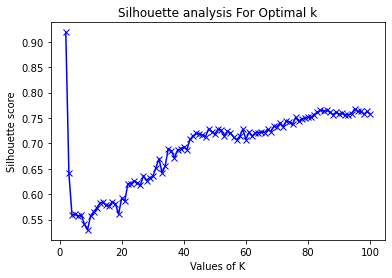

In [12]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters).fit(data)
    # silhouette score
    silhouette_avg.append(silhouette_score(data, kmeans.labels_))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
    

plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [13]:
silhouette_avg

[0.9186246913410584,
 0.6406627955100216,
 0.5586227750321567,
 0.5604489662928477,
 0.5575976873610466,
 0.5586394768078495,
 0.5407189142971478,
 0.5295054401509603,
 0.5575540963185455,
 0.5654290268387305,
 0.5727003509562332,
 0.582688524790407,
 0.5841041969555288,
 0.5777472906019663,
 0.5769155186753371,
 0.5853622046337115,
 0.5803261501728678,
 0.5607652637235847,
 0.5920885022844377,
 0.5864959045789622,
 0.6200862186357686,
 0.6203847681482183,
 0.6260750155535026,
 0.6226246685012815,
 0.6177597158198214,
 0.6359247597963564,
 0.6266066440256279,
 0.6325778904117059,
 0.6346700533561281,
 0.6514382984844603,
 0.6699450785876766,
 0.6418569362519979,
 0.6559052944757634,
 0.6894800658599932,
 0.6850765471960836,
 0.6713009705362394,
 0.6866544725173138,
 0.6892652331675856,
 0.6931384731677348,
 0.6877002997968776,
 0.7076778456600626,
 0.7147045669488046,
 0.7196387814391789,
 0.7188301111251352,
 0.7162882779617212,
 0.7131944495024771,
 0.7287641250459334,
 0.72290269270

In [14]:
#kmeans = KMeans(n_clusters=3)
#label = kmeans.fit_predict(df[['latitude', 'longitude']])
#label

kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

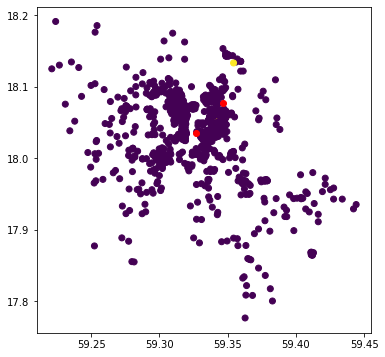

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6)) 
ax = fig.add_subplot(1, 1, 1)
ax.scatter(data[:,0],data[:,1], c = kmeans.labels_)
fig.canvas.draw()

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')

fig.canvas.draw()

In [ ]:
#filter rows of original data
#filtered_label0 = df[label == 0]
#filtered_label1 = df[label == 1]
#filtered_label2 = df[label == 2]

#Plotting the results
#plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , color = 'red')
#plt.scatter(filtered_label1.iloc[:,0].values , filtered_label1.iloc[:,1].values , color = 'black')
#plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'green')
#plt.show()

In [ ]:
np.set_printoptions(threshold=df_type_room.shape[0])
kmeans.labels_


In [ ]:
np.count_nonzero(kmeans.labels_ == 1)

In [ ]:
indices = [i for i in range(len(kmeans.labels_)) if kmeans.labels_[i]==1] 

In [ ]:
indices

In [ ]:
df_type_room.iloc[[1655]]

In [ ]:
df_type_room.iloc[[806]]

In [ ]:
df_type_room.iloc[[291]]

In [ ]:
df_type_room.iloc[[810]]

In [ ]:
df_type_room.iloc[[1013]]